In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
def plot_monitor_results(base, dots=False, summary=False):
    files = [base + f for f in os.listdir(base)]
    files = [f for f in files if 'csv' in f]
    if len(files) > 1:
        files = sorted(
            files, 
            key=lambda x : int(x.split("/")[-1].split(".")[0])
        )
    csvs = [pd.read_csv(f, skiprows=[0]) for f in files]
    
    def cluster_by_t(df):
        new_csv0 = df.copy(deep=True)
        new_csv0['t_int'] = new_csv0['t'].apply(int)
        new_csv0 = new_csv0.groupby('t_int').agg({'r': 'mean'}).reset_index()
        new_csv0 = new_csv0.iloc[::10]
        return new_csv0
    
    csvs = [cluster_by_t(df) for df in csvs]
    large_df = pd.concat(csvs).reset_index(drop='index')
    large_df = large_df.groupby('t_int').agg({'r': 'mean'}).reset_index()
    
    if not summary:
        if dots:
            for df in csvs:
                sns.scatterplot(data=df, x='t_int', y='r')
        else:
            for df in csvs:
                sns.regplot(data=df, x='t_int', y='r', scatter_kws={"s": 2}, order=5)
    else:
        if dots:
            sns.scatterplot(data=large_df, x='t_int', y='r')
        else:
            sns.regplot(data=large_df, x='t_int', y='r', scatter_kws={"s": 2}, order=5)
    plt.show()

# PPO Analysis

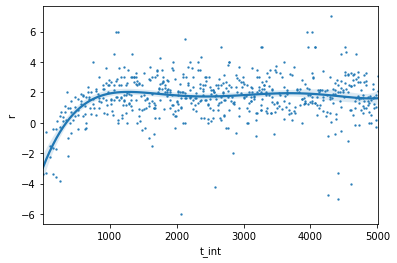

In [25]:
plot_monitor_results('./logs/tmp_mp_ppo/', dots=False, summary=True)

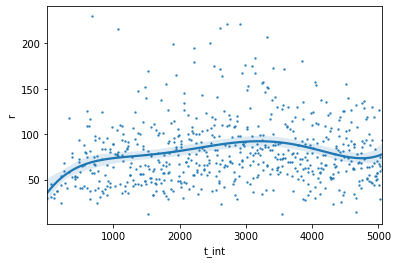

In [26]:
plot_monitor_results('./logs/tmp_ppo_reward=new/', dots=False, summary=True)

# DQN Analysis

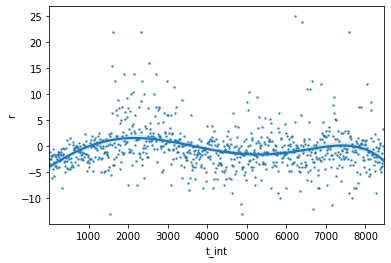

In [21]:
plot_monitor_results('./logs/tmp_mp_dqn/')

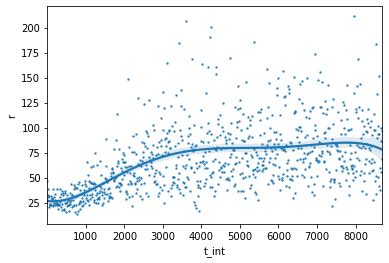

In [22]:
plot_monitor_results('./logs/tmp_dqn_reward=new/')

# A2C Analysis

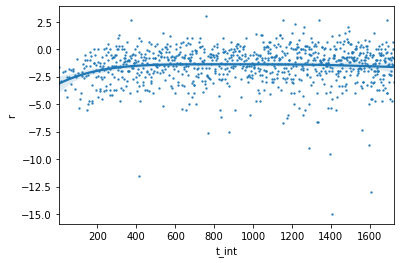

In [29]:
plot_monitor_results('./logs/tmp_mp_a2c/', dots=False, summary=True)

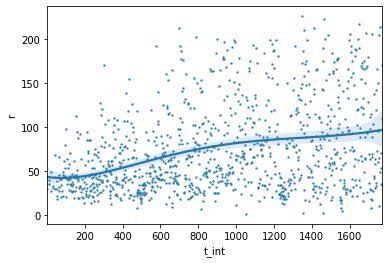

In [30]:
plot_monitor_results('./logs/tmp_a2c_reward=new/', dots=False, summary=True)